In [56]:
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- Configuration ---
base_path = "/Users/souba636/Documents/vinnova_project_python/data/T-SNE-data"
attack_keywords = ["disflooding", "worstparent", "localrepair", "blackhole"]
attack_labels = {
    "disflooding": "Disflooding",
    "worstparent": "Worstparent",
    "localrepair": "Localrepair",
    "blackhole": "Blackhole"
}
fixed_colors = {
    "Disflooding": "#f7060a00",    
    "Worstparent": "#377eb8",    
    "Localrepair": "#4daf4a",    
    "Blackhole": "#046249"       
}

# --- Load CSVs ---
csv_files = []
domain_labels = []

for keyword in attack_keywords:
    for file in os.listdir(base_path):
        if keyword in file and file.endswith(".csv"):
            full_path = os.path.join(base_path, file)
            csv_files.append(full_path)
            domain_labels.append(attack_labels[keyword])
            break

dataframes = []
for path, label in zip(csv_files, domain_labels):
    df = pd.read_csv(path)
    df['attack'] = label
    dataframes.append(df)

# --- Combine ALL data first (for fixed TSNE layout) ---
full_df = pd.concat(dataframes, ignore_index=True)
label_col = full_df.columns[-2]
attack_col = full_df.columns[-1]

df_label_1 = full_df[full_df[label_col] == 1]
features = df_label_1.iloc[:, :-2].values
attacks = df_label_1[attack_col].values

# --- Run t-SNE only once ---
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(features)

# --- Attach t-SNE coords to dataframe ---
tsne_df = pd.DataFrame(tsne_result, columns=['x', 'y'])
tsne_df['attack'] = attacks



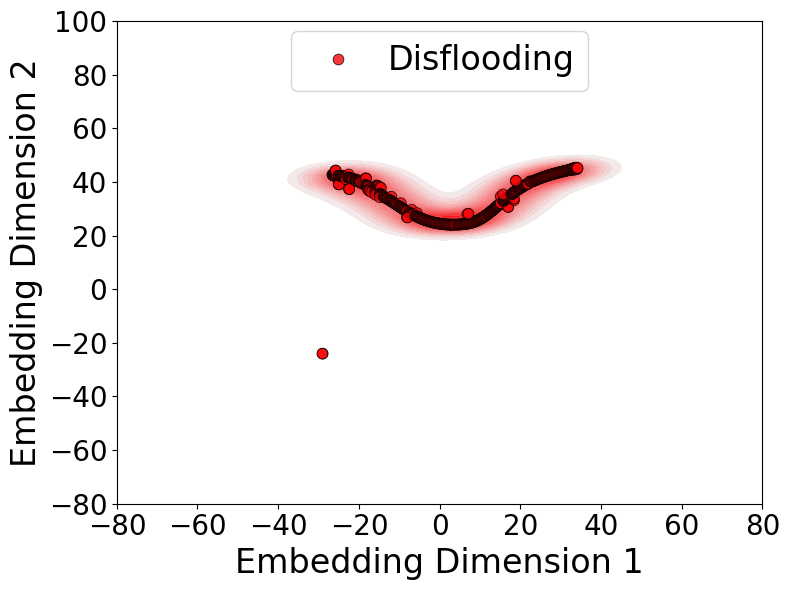

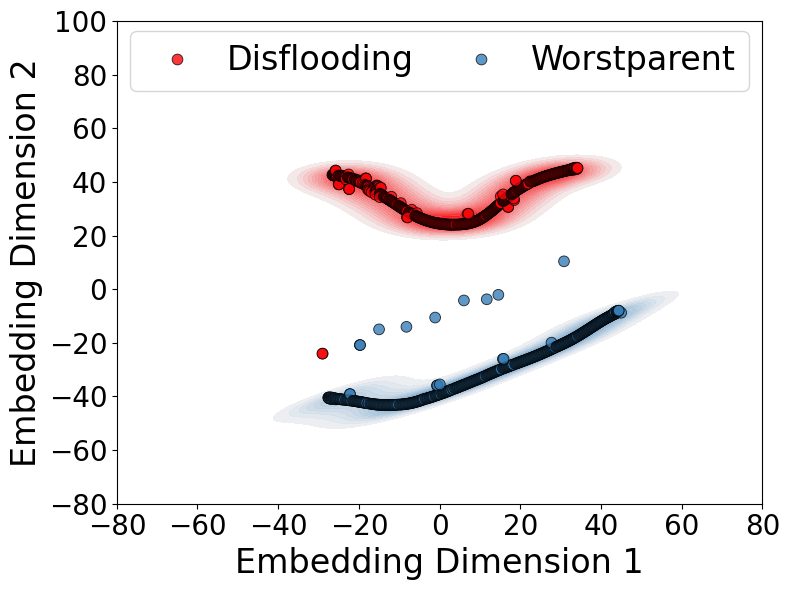

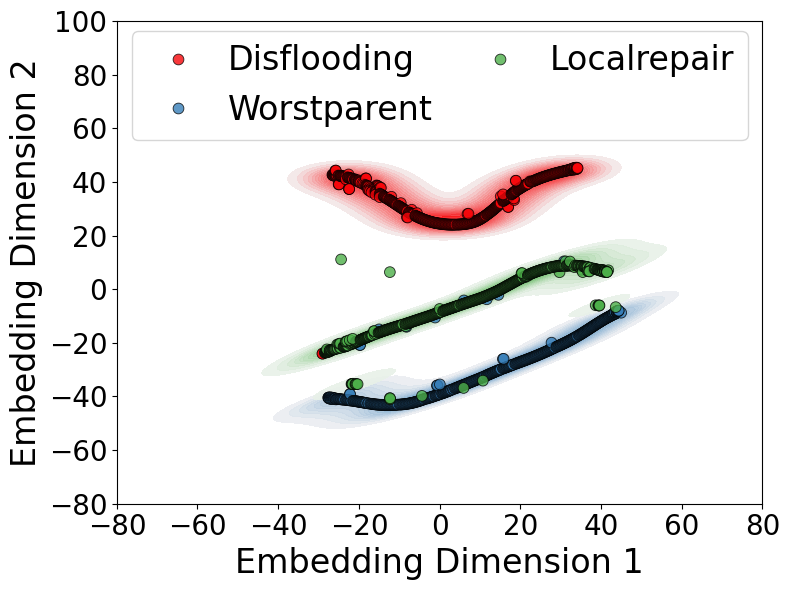

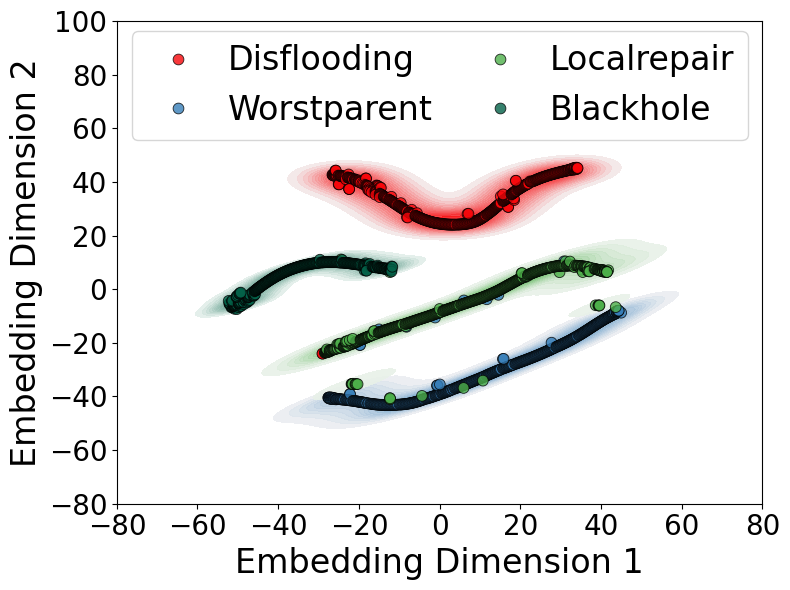

In [57]:
# --- Plot incrementally using same t-SNE layout ---
for idx in range(1, len(domain_labels) + 1):
    current_labels = domain_labels[:idx]
    current_palette = {k: fixed_colors[k] for k in current_labels}
    df_to_plot = tsne_df[tsne_df['attack'].isin(current_labels)]

    plt.figure(figsize=(8, 6))
    
    # KDE background shading (before scatter)
    for attack_type in current_labels:
        group = df_to_plot[df_to_plot['attack'] == attack_type]
        if len(group) > 1:  # KDE requires >1 point
            sns.kdeplot(
                x=group['x'], y=group['y'],
                fill=True,
                cmap=sns.light_palette(current_palette[attack_type], as_cmap=True),
                alpha=0.9,
                levels=20,
                thresh=0.05
            )

    # Scatter plot
    sns.scatterplot(
        data=df_to_plot,
        x='x',
        y='y',
        hue='attack',
        palette=current_palette,
        s=60,
        edgecolor='k',
        alpha=0.8
    )
    
    plt.xlim(-80, 80)
    plt.ylim(-80, 100)
    plt.xlabel("Embedding Dimension 1", fontsize=24)
    plt.ylabel("Embedding Dimension 2", fontsize=24)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    plt.legend(
        loc='upper center',
        bbox_to_anchor=(0.5, 1.0),
        fontsize=24,
        ncol=2,
        handletextpad=0.5,
        columnspacing=1.0,
        borderaxespad=0.3
    )
    plt.tight_layout()

    save_name = f"/Users/souba636/Documents/vinnova_paper_1/figure/tsne_incremental_step{idx}.png"
    plt.savefig(save_name, dpi=300)
    plt.show()

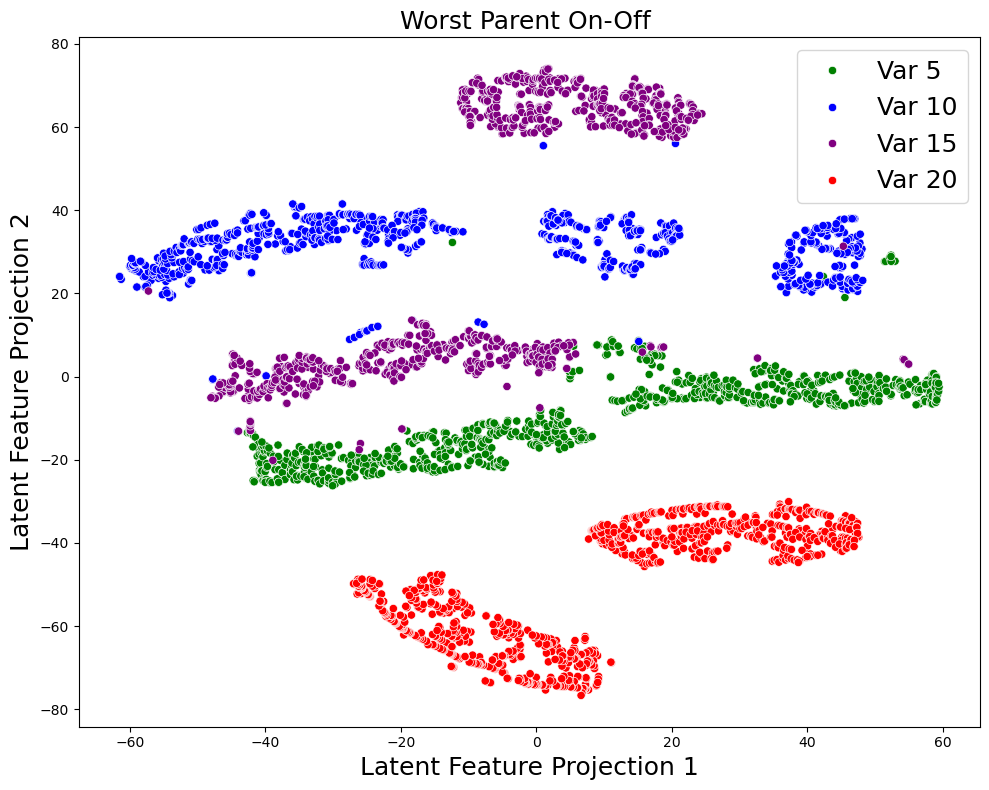

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import os


base_path = "/Users/souba636/Documents/vinnova_project_python/data/T-SNE-data"
domain_files = []    
for folder_name in os.listdir(base_path):
    if "worstparent" in folder_name and "oo" in folder_name:  ####change 
        folder_path = os.path.join(base_path, folder_name)
        if os.path.isdir(folder_path):
            # Read the first file in the folder
            files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
            if files:   
                # Prepend full path
                full_file_path = os.path.join(folder_path, files[0])
                domain_files.append(full_file_path)

# Domain CSV paths
train_domain_paths = {
    'Var 5' : domain_files[0],
    'Var 10' : domain_files[1],
    'Var 15' : domain_files[2],
    'Var 20' : domain_files[3]
}

# Custom color palette for visualization
custom_palette = {
    'Var 5': 'green',
    'Var 10': 'blue',
    'Var 15': 'purple',
    'Var 20': 'red'  
}

# Load and label data from each domain
domain_dfs = []
for domain, path in train_domain_paths.items():
    df = pd.read_csv(path)
    df['domain'] = domain
    domain_dfs.append(df)

# Concatenate all data
full_df = pd.concat(domain_dfs, ignore_index=True)

# Separate features and labels
features = full_df.drop(columns=['label', 'domain'], errors='ignore')
labels = full_df['domain']

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(features_scaled)

# Create t-SNE DataFrame
tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])
tsne_df['Domain'] = labels.values

# Plot t-SNE
plt.figure(figsize=(10, 8))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Domain', palette=custom_palette)
plt.title('Worst Parent On-Off ', fontsize=18)   ############################ change the file name
plt.xlabel('Latent Feature Projection 1', fontsize=18)
plt.ylabel('Latent Feature Projection 2', fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.tight_layout()
plt.savefig("results/scenario_plot/tsne_domains_worstparent_oo.png")     ######## change the file name
plt.show()


In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import linkage

# Step 1: Define base path
base_path = "/Users/souba636/Documents/vinnova_project_python/data/scenario"

# Step 2: Read one CSV from each scenario folder
domain_paths = {}
for folder_name in sorted(os.listdir(base_path)):
    folder_path = os.path.join(base_path, folder_name)
    if os.path.isdir(folder_path):
        files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]
        if files:
            domain_paths[folder_name] = os.path.join(folder_path, files[0])

# Step 3: Load and preprocess feature data
scaler = StandardScaler()
domain_features = {}
for domain, path in domain_paths.items():
    df = pd.read_csv(path)
    X = df.drop(columns=['label'], errors='ignore').values
    X_scaled = scaler.fit_transform(X)
    domain_features[domain] = X_scaled

# Step 4: Compute MMD
def compute_mmd(X1, X2, gamma=None):
    if gamma is None:
        gamma = 1.0 / X1.shape[1]
    Kxx = np.exp(-cdist(X1, X1, 'sqeuclidean') * gamma)
    Kyy = np.exp(-cdist(X2, X2, 'sqeuclidean') * gamma)
    Kxy = np.exp(-cdist(X1, X2, 'sqeuclidean') * gamma)
    return Kxx.mean() + Kyy.mean() - 2 * Kxy.mean()

domain_list = list(domain_features.keys())

n = len(domain_list)
mmd_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        mmd_matrix[i, j] = compute_mmd(domain_features[domain_list[i]], domain_features[domain_list[j]])

# Step 5: Shorten names for clarity
def shorten(name):
    parts = name.split('_')
    prefix_map = {
        "blackhole": "bh",
        "disflooding": "df",
        "localrepair": "lr",
        "worstparent": "wp"
    }
    prefix = prefix_map.get(parts[0], parts[0][:2])
    return f"{prefix}_v{parts[1][3:]}_{parts[2]}"

short_names = [shorten(name) for name in domain_list]

# Step 6: Plot clustered heatmap (without annotation numbers)
sns.set_theme(font_scale=0.9)
g = sns.clustermap(
    mmd_matrix,
    row_cluster=True,
    col_cluster=True,
    row_linkage=linkage(mmd_matrix, method='ward'),
    col_linkage=linkage(mmd_matrix.T, method='ward'),
    xticklabels=short_names,
    yticklabels=short_names,
    cmap="coolwarm",
    annot=False,  # no numbers
    linewidths=0.5,
    figsize=(16, 14),
    cbar_kws={'label': 'MMD Distance'}
)

plt.suptitle("Hierarchically Clustered MMD Heatmap", fontsize=18, y=1.02)

# Ensure output directory exists
os.makedirs("results/scenario_plot", exist_ok=True)
plt.savefig("results/scenario_plot/mmd_clustered_no_annotations.png")
plt.show()


Domain list: ['blackhole_var10_base', 'blackhole_var10_dec', 'blackhole_var10_oo', 'blackhole_var15_base', 'blackhole_var15_dec', 'blackhole_var15_oo', 'blackhole_var20_base', 'blackhole_var20_dec', 'blackhole_var20_oo', 'blackhole_var5_base', 'blackhole_var5_dec', 'blackhole_var5_oo', 'disflooding_var10_base', 'disflooding_var10_dec', 'disflooding_var10_oo', 'disflooding_var15_base', 'disflooding_var15_dec', 'disflooding_var15_oo', 'disflooding_var20_base', 'disflooding_var20_dec', 'disflooding_var20_oo', 'disflooding_var5_base', 'disflooding_var5_dec', 'disflooding_var5_oo', 'localrepair_var10_base', 'localrepair_var10_dec', 'localrepair_var10_oo', 'localrepair_var15_base', 'localrepair_var15_dec', 'localrepair_var15_oo', 'localrepair_var20_base', 'localrepair_var20_dec', 'localrepair_var20_oo', 'localrepair_var5_base', 'localrepair_var5_dec', 'localrepair_var5_oo', 'worstparent_var10_base', 'worstparent_var10_dec', 'worstparent_var10_oo', 'worstparent_var15_base', 'worstparent_var15

SystemExit: 

/Users/souba636/anaconda3/envs/vinnova/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


/var/folders/ld/f2yvzx4155lc1np6yd4rhdrm0000gn/T/ipykernel_6054/2238522021.py:4: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(mmd_matrix, method='ward')


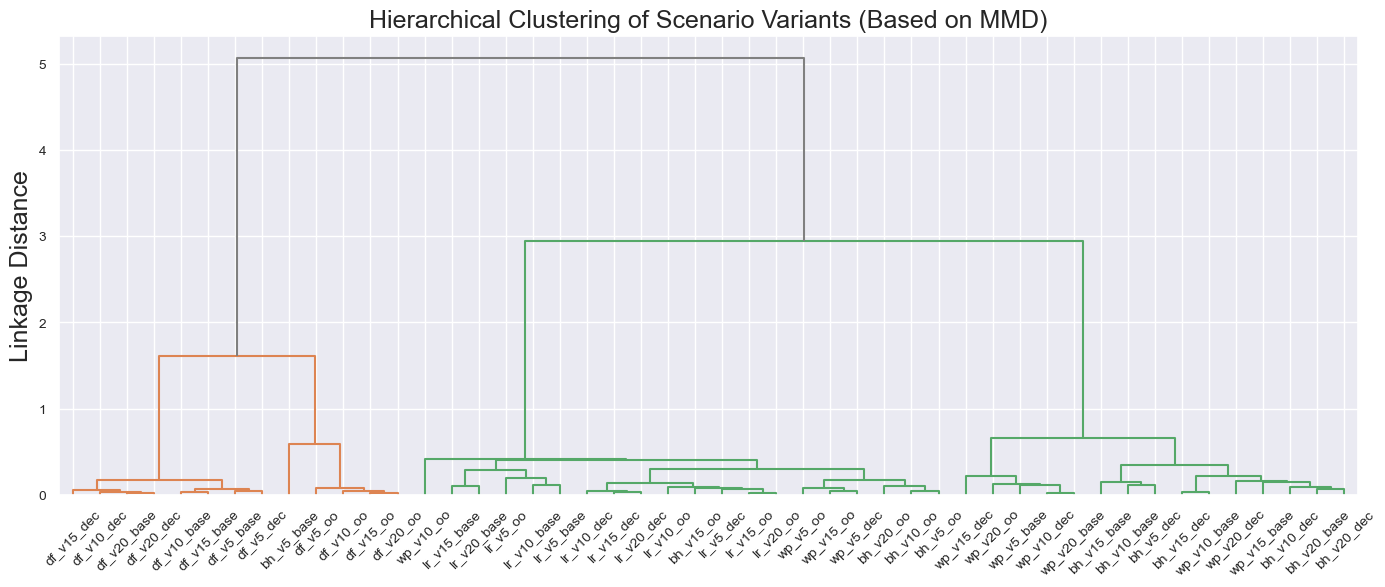

In [4]:
from scipy.cluster.hierarchy import dendrogram

# Compute linkage matrix
Z = linkage(mmd_matrix, method='ward')

# Plot dendrogram
plt.figure(figsize=(14, 6))
dendrogram(
    Z,
    labels=short_names,
    leaf_rotation=45,
    leaf_font_size=10,
    color_threshold=None,  # Show full hierarchy
    above_threshold_color='gray',
)

plt.title("Hierarchical Clustering of Scenario Variants (Based on MMD)", fontsize=18)
plt.ylabel("Linkage Distance", fontsize=18)
plt.tight_layout()
plt.savefig("results/scenario_plot/mmd_hierarchical_dendrogram.png")
plt.show()


In [6]:
from scipy.cluster.hierarchy import fcluster
from collections import defaultdict

distance_threshold = 2.0
cluster_assignments = fcluster(Z, t=distance_threshold, criterion='distance')

clusters = defaultdict(list)
for idx, cluster_id in enumerate(cluster_assignments):
    clusters[cluster_id].append(domain_list[idx])

# Output clusters
for cluster_id, members in clusters.items():
    print(f"Cluster {cluster_id}: {members}")


Cluster 3: ['blackhole_var10_base', 'blackhole_var10_dec', 'blackhole_var15_base', 'blackhole_var15_dec', 'blackhole_var20_base', 'blackhole_var20_dec', 'blackhole_var5_dec', 'worstparent_var10_base', 'worstparent_var10_dec', 'worstparent_var15_base', 'worstparent_var15_dec', 'worstparent_var20_base', 'worstparent_var20_dec', 'worstparent_var20_oo', 'worstparent_var5_base']
Cluster 2: ['blackhole_var10_oo', 'blackhole_var15_oo', 'blackhole_var20_oo', 'blackhole_var5_oo', 'localrepair_var10_base', 'localrepair_var10_dec', 'localrepair_var10_oo', 'localrepair_var15_base', 'localrepair_var15_dec', 'localrepair_var15_oo', 'localrepair_var20_base', 'localrepair_var20_dec', 'localrepair_var20_oo', 'localrepair_var5_base', 'localrepair_var5_dec', 'localrepair_var5_oo', 'worstparent_var10_oo', 'worstparent_var15_oo', 'worstparent_var5_dec', 'worstparent_var5_oo']
Cluster 1: ['blackhole_var5_base', 'disflooding_var10_base', 'disflooding_var10_dec', 'disflooding_var10_oo', 'disflooding_var15_bas

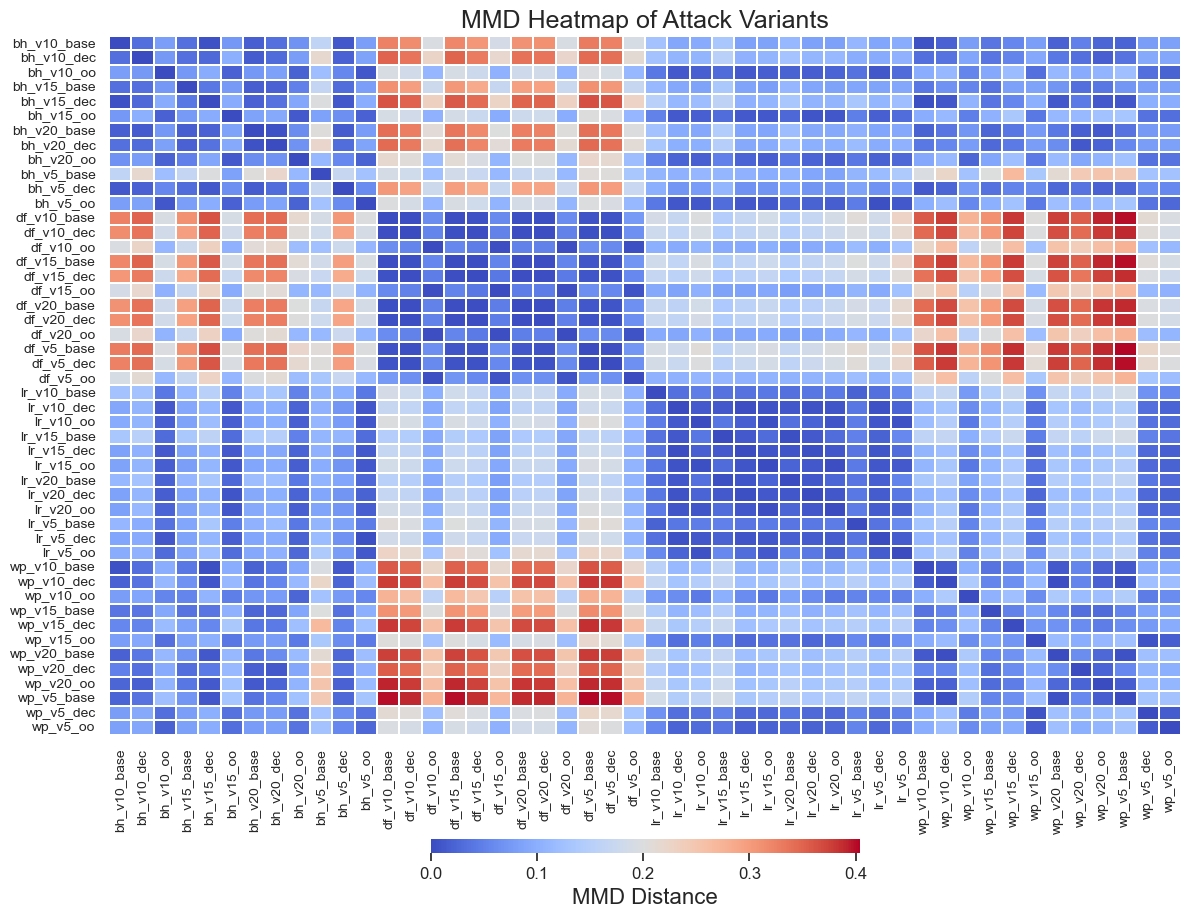

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 10))

# Draw heatmap and get the colorbar axis
heatmap = sns.heatmap(
    mmd_matrix,
    xticklabels=short_names,
    yticklabels=short_names,
    cmap="coolwarm",
    annot=False,
    linewidths=0.3,
    cbar_kws={
        'label': 'MMD Distance',
        'shrink': 0.4,
        'orientation': 'horizontal',
        'pad': 0.11,
        'aspect': 30
    },
    ax=ax
)

# Manually update colorbar label font size
colorbar = heatmap.collections[0].colorbar
colorbar.ax.set_xlabel("MMD Distance", fontsize=16)  # <- increase font size here

# Customize tick font size if needed
colorbar.ax.tick_params(labelsize=12)

# Axis ticks
ax.tick_params(axis='x', labelrotation=90, labelsize=10)
ax.tick_params(axis='y', labelrotation=0, labelsize=10)

# Title
plt.title("MMD Heatmap of Attack Variants", fontsize=18)

# Save
plt.tight_layout()
plt.savefig("results/scenario_plot/mmd_heatmap_compact_alignedbar_larger_font.png", dpi=300)
plt.show()


In [12]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import linkage

# Step 1: Define base path
base_path = "/Users/souba636/Documents/vinnova_project_python/data/scenario"

# Step 2: Read one CSV from each scenario folder
domain_paths = {}
for folder_name in sorted(os.listdir(base_path)):
    folder_path = os.path.join(base_path, folder_name)
    if os.path.isdir(folder_path):
        files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]
        if files:
            domain_paths[folder_name] = os.path.join(folder_path, files[0])
print(domain_paths)
# Step 3: Load and preprocess feature data
scaler = StandardScaler()
domain_features = {}
for domain, path in domain_paths.items():
    df = pd.read_csv(path)
    X = df.drop(columns=['label'], errors='ignore').values
    X_scaled = scaler.fit_transform(X)
    domain_features[domain] = X_scaled

# print(domain_features)

domain_list = list(domain_features.keys())

print(domain_list)

{'blackhole_var10_base': '/Users/souba636/Documents/vinnova_project_python/data/scenario/blackhole_var10_base/blackhole_var10_base_9_features_timeseries_60_sec.csv', 'blackhole_var10_dec': '/Users/souba636/Documents/vinnova_project_python/data/scenario/blackhole_var10_dec/blackhole_var10_dec_18_features_timeseries_60_sec.csv', 'blackhole_var10_oo': '/Users/souba636/Documents/vinnova_project_python/data/scenario/blackhole_var10_oo/blackhole_var10_oo_12_features_timeseries_60_sec.csv', 'blackhole_var15_base': '/Users/souba636/Documents/vinnova_project_python/data/scenario/blackhole_var15_base/blackhole_var15_base_5_features_timeseries_60_sec.csv', 'blackhole_var15_dec': '/Users/souba636/Documents/vinnova_project_python/data/scenario/blackhole_var15_dec/blackhole_var15_dec_12_features_timeseries_60_sec.csv', 'blackhole_var15_oo': '/Users/souba636/Documents/vinnova_project_python/data/scenario/blackhole_var15_oo/blackhole_var15_oo_9_features_timeseries_60_sec.csv', 'blackhole_var20_base': 

In [ ]:
from scipy.cluster.hierarchy import dendrogram

# Compute linkage matrix
Z = linkage(mmd_matrix, method='ward')

# Plot dendrogram
plt.figure(figsize=(14, 6))
dendrogram(
    Z,
    labels=short_names,
    leaf_rotation=45,
    leaf_font_size=10,
    color_threshold=None,  # Show full hierarchy
    above_threshold_color='gray',
)

plt.title("Hierarchical Clustering of Scenario Variants (Based on MMD)", fontsize=18)
plt.ylabel("Linkage Distance", fontsize=18)
plt.tight_layout()
plt.savefig("results/scenario_plot/mmd_hierarchical_dendrogram.png")
plt.show()
